# Resorte no lineal con amortiguamiento y fuerza externa

El problema de resorte no lineal con amortiguamiento y fuerza externa peude escribirse como
$$\begin{align*} mu''+f(u')+s(u)&=&F(u) \\ u(0)&=&I, \\ u'(0)&=&V, \\ i&\in&(0,T], \end{align*}$$
donde $m$ es la masa de la particula, $f$ es la fuerza de amortiguamiento, $s$ fuerza del resorte y $F$ fuerza externa.

Hay dos tipos principales de fuerzas de amortiguamiento (fricción): lineal $f(u′)=bu4, o cuadrática $f(u′)=bu′|u′|$. Los sistemas de resorte a menudo presentan amortiguación lineal, mientras que la resistencia del aire generalmente da lugar a una amortiguación cuadrática. Las fuerzas de los resortes suelen ser lineales: $s(u)=cu$, pero también son comunes las versiones no lineales, la más famosa es la fuerza de gravedad sobre un péndulo que actúa como un resorte con $s(u)=sin(u)$.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
#import scitools as pltsct

#import scitools.std as plt

import sympy as sym

from math import asin

Construyamos una funcion que dada los datos calcule la solucion numerica de la edo anterior por diferencias finitas centradas con un paso `dt`

In [23]:
def solver(I, V, m, b, s, F, dt, T, damping='linear'):
    """
    Si el amortiguamiento es 'linear', f(u')=b*u, mientras qeu si el amortiguamiento es
    'quadratic', f(u')=b*u'*abs(u').
    F(t) y s(u) son funciones de Python.
    """
    dt = float(dt); b = float(b); m = float(m) # para evitar la divicion entera
    Nt = int(round(T/dt))
    u = np.zeros(Nt+1)
    t = np.linspace(0, Nt*dt, Nt+1)

    u[0] = I
    if damping == 'linear':
        u[1] = u[0] + dt*V + dt**2/(2*m)*(-b*V - s(u[0]) + F(t[0]))
    elif damping == 'quadratic':
        u[1] = u[0] + dt*V + \
               dt**2/(2*m)*(-b*V*abs(V) - s(u[0]) + F(t[0]))

    for n in range(1, Nt):
        if damping == 'linear':
            u[n+1] = (2*m*u[n] + (b*dt/2 - m)*u[n-1] +
                      dt**2*(F(t[n]) - s(u[n])))/(m + b*dt/2)
        elif damping == 'quadratic':
            u[n+1] = (2*m*u[n] - m*u[n-1] + b*u[n]*abs(u[n] - u[n-1])
                      + dt**2*(F(t[n]) - s(u[n])))/\
                      (m + b*abs(u[n] - u[n-1]))
    return u, t


In [24]:
# Fuencion que grafica la solucion
def visualize(u, t, title='', filename='tmp'):
    plt.plot(t, u, 'b-')
    plt.xlabel('t')
    plt.ylabel('u')
    dt = t[1] - t[0]
    plt.title('dt=%g' % dt)
    umin = 1.2*u.min(); umax = 1.2*u.max()
    plt.axis([t[0], t[-1], umin, umax])
    plt.title(title)
    #plt.savefig(filename + '.png')
    #plt.savefig(filename + '.pdf')
    plt.show()

In [25]:
# funcion que muestra la comparacion entre la solucion numerica y la exacta
def visualize(u, t):#, I, w):
    plt.figure(figsize=(18,8))
    #plt.plot(t, u, 'r--o')
    plt.plot(t, u, 'b-')
    #t_fine = np.linspace(0, t[-1], 1001) # una malla muy fina para la solucion exacta
    #u_e = u_exact(t_fine, I, w)
    #plt.plot(t_fine, u_e, 'b-')
    #plt.legend(['numerical', 'exact'], loc='upper left')
    plt.xlabel('t')
    plt.ylabel('u')
    dt = t[1] - t[0]
    plt.title('dt=%g' % dt)
    umin = 1.2*u.min(); umax = -umin
    plt.axis([t[0], t[-1], umin, umax])
    #plt.savefig('tmp1.png')
    #plt.savefig('tmp1.pdf')
    plt.show()

In [26]:
def lhs_eq(t, m, b, s, u, damping='linear'):
    """Retorna lhs de la edo como una expresion de sympy"""
    v = sym.diff(u, t)
    if damping == 'linear':
        return m*sym.diff(u, t, t) + b*v + s(u)
    else:
        return m*sym.diff(u, t, t) + b*v*sym.Abs(v) + s(u)

### Constante

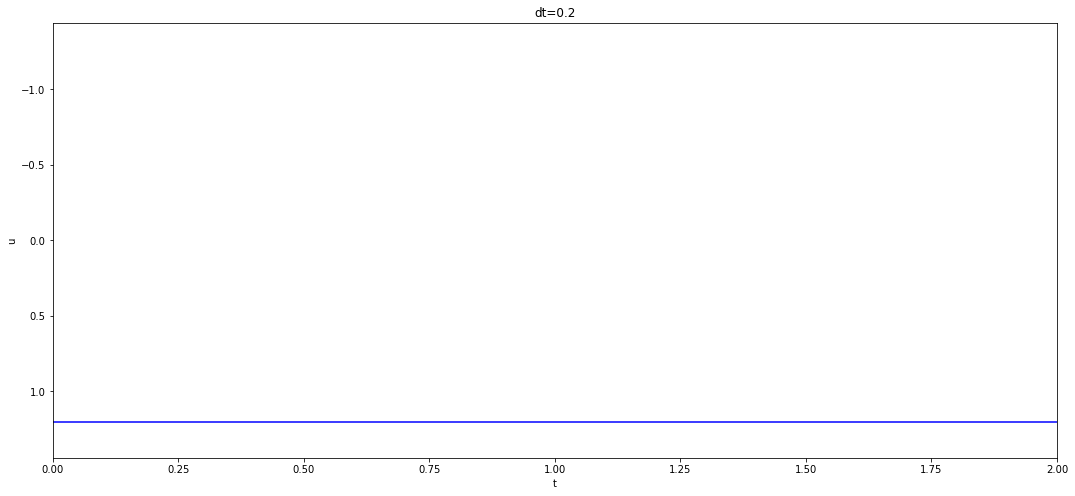

In [27]:
u_exact = lambda t: I

# Parametros del problema
I = 1.2; V = 0; m = 2; b = 0.9
w = 1.5
s = lambda u: w**2*u
F = lambda t: w**2*u_exact(t)
dt = 0.2
T = 2

# Resolucion mumercia
u, t = solver(I, V, m, b, s, F, dt, T, 'linear')

# Mostramos el grafico
visualize(u, t)

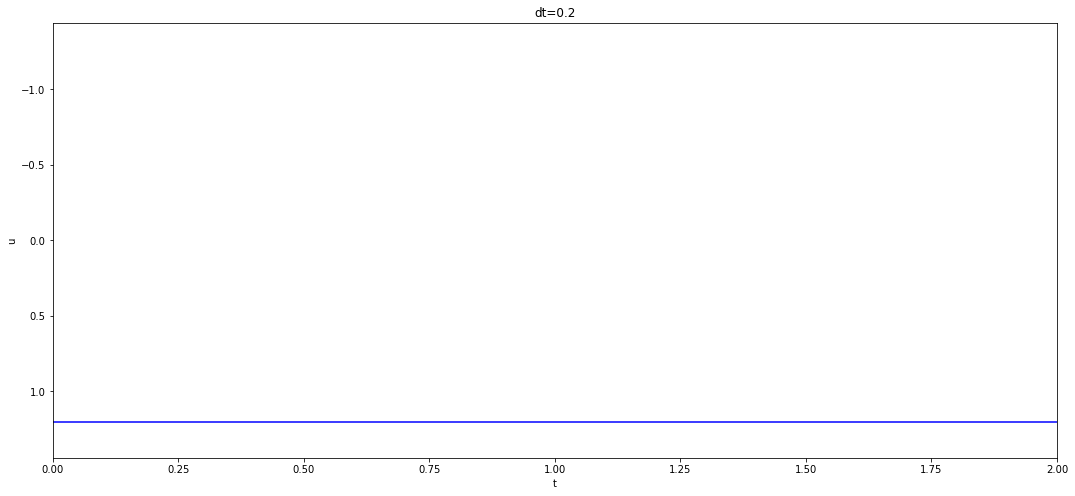

In [28]:
# Resolucion numerica
u, t = solver(I, V, m, b, s, F, dt, T, 'quadratic')

# Mostramos el grafico
visualize(u, t)

### Cuadratica

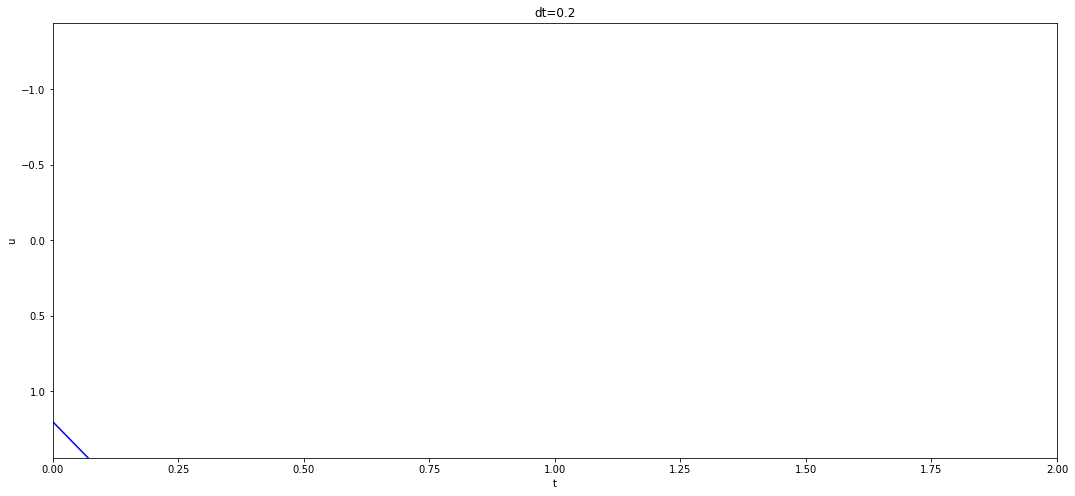

In [29]:
# Parametros del problema
I = 1.2; V = 3; m = 2; b = 0.9
s = lambda u: 4*u
t = sym.Symbol('t')
dt = 0.2
T = 2

q = 2  # constante arbitraria
u_exact = I + V*t + q*t**2
F = sym.lambdify(t, lhs_eq(t, m, b, s, u_exact, 'linear'))

# Resolvemos numericamente la edo
u1, t1 = solver(I, V, m, b, s, F, dt, T, 'linear')

# Graficamos la solucion
visualize(u1, t1)

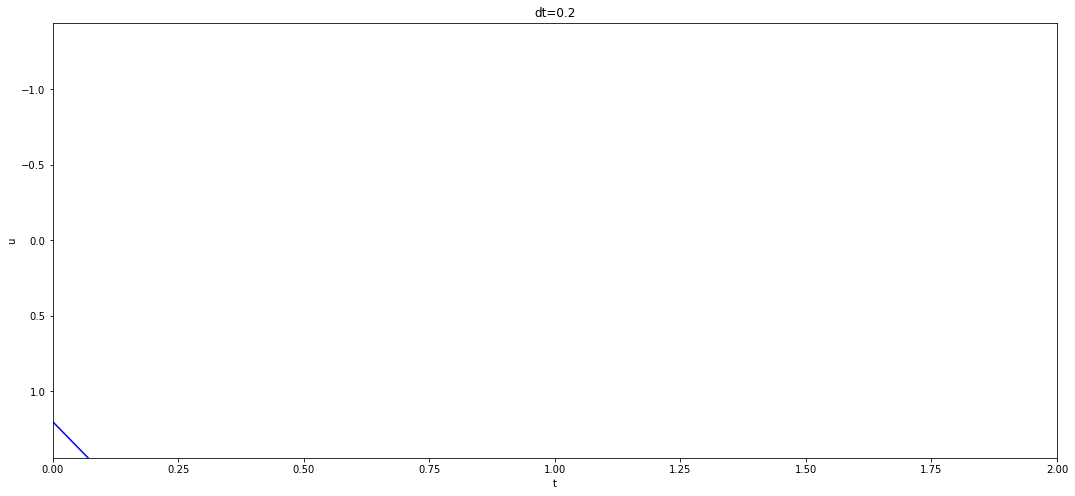

In [30]:
#u_exact = I + V*t
F = sym.lambdify(t, lhs_eq(t, m, b, s, u_exact, 'quadratic'))
u_exact = sym.lambdify(t, u_exact, modules='numpy')
u2, t2 = solver(I, V, m, b, s, F, dt, T, 'quadratic')

# Graficamos la solucion
visualize(u2, t2)

### Sinusoideal

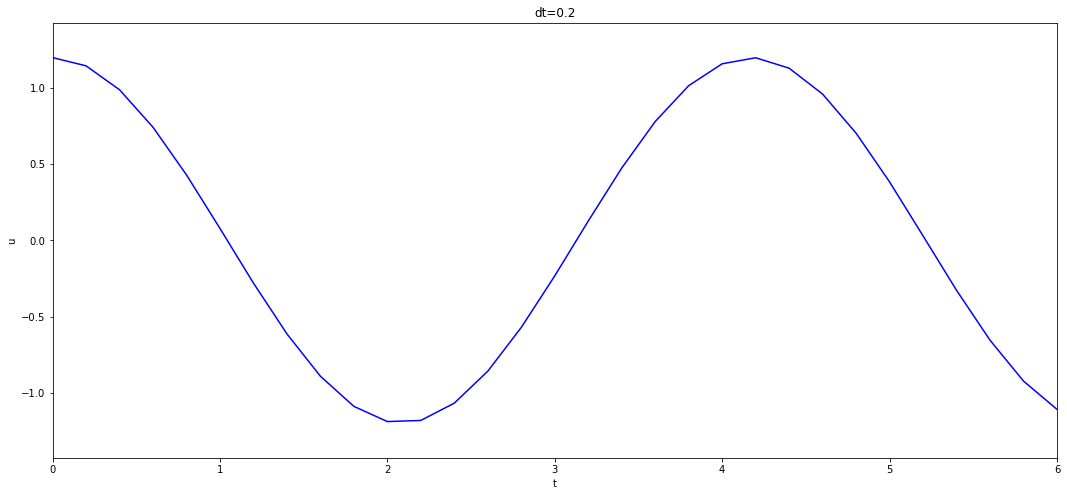

In [31]:
# Parametros del problema
I = 1.2; V = 0; m = 2; b = 0
w = 1.5  # fijamos la frecuencia
s = lambda u: m*w**2*u
F = lambda t: 0
dt = 0.2
T = 6

# Resolvemos numericamente la edo
u, t = solver(I, V, m, b, s, F, dt, T, 'linear')

# Graficamos la solucion
visualize(u, t)

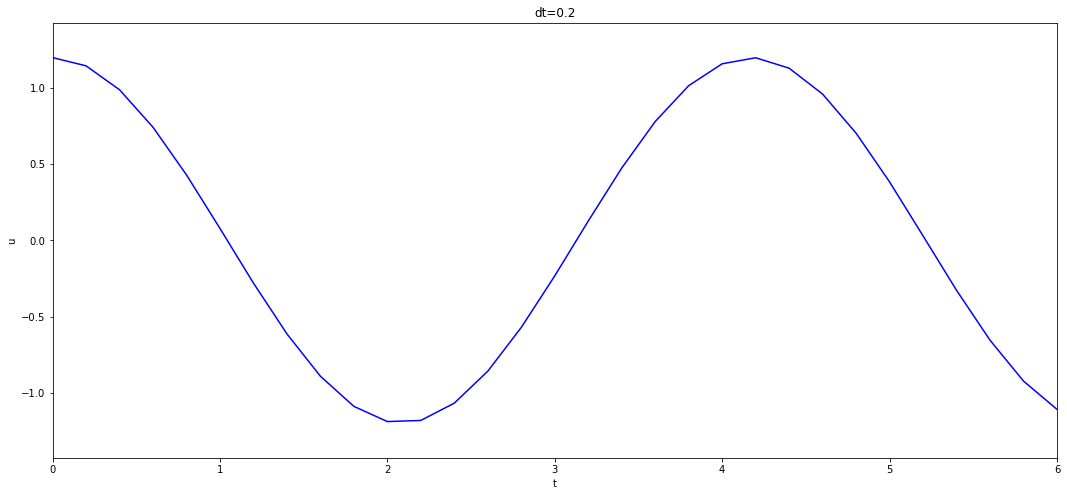

In [32]:
# Resolvemos numericamente la edo
u, t = solver(I, V, m, b, s, F, dt, T, 'quadratic')

# Graficamos la solucion
visualize(u, t)